In [62]:
from keras.datasets import reuters

In [63]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

train_data.shape

(8982,)

In [64]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
                             train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [65]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [66]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.

    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
#the same code above can be done by using keras to_categorical
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
x_val = x_train[:999]
partial_x_train = x_train[999:]
y_val = one_hot_train_labels[:999]
partial_y_train = one_hot_train_labels[999:]

In [69]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 41ms/step - loss: 2.8175 - accuracy: 0.5039 - val_loss: 1.8563 - val_accuracy: 0.6316
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 1.5468 - accuracy: 0.6823 - val_loss: 1.3845 - val_accuracy: 0.6857
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 1.1773 - accuracy: 0.7388 - val_loss: 1.1996 - val_accuracy: 0.7327
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.9686 - accuracy: 0.7855 - val_loss: 1.1023 - val_accuracy: 0.7467
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.8083 - accuracy: 0.8220 - val_loss: 1.0455 - val_accuracy: 0.7678
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6768 - accuracy: 0.8521 - val_loss: 0.9692 - val_accuracy: 0.7988
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5675 - accuracy: 0.8772 - val_loss: 0.9296 - val_accuracy: 0.7978
Epoch 8/20
16

In [70]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.0562 - accuracy: 0.7956


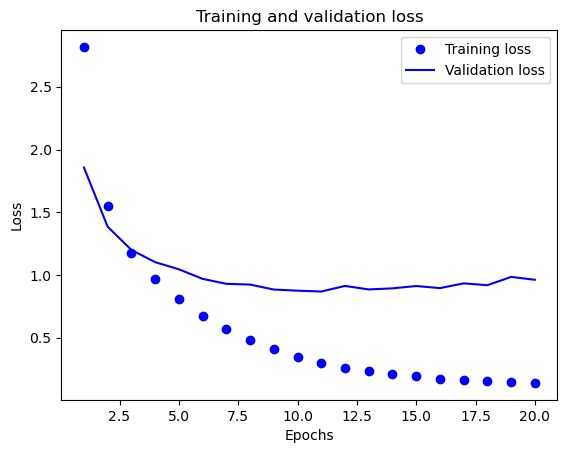

In [71]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [78]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 2s 45ms/step - loss: 3.6542 - accuracy: 0.0333 - val_loss: 3.4328 - val_accuracy: 0.0611
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 3.2470 - accuracy: 0.0985 - val_loss: 3.0739 - val_accuracy: 0.1221
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 2.8683 - accuracy: 0.2522 - val_loss: 2.7125 - val_accuracy: 0.3103
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 2.4705 - accuracy: 0.4020 - val_loss: 2.3282 - val_accuracy: 0.5976
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 2.0621 - accuracy: 0.6310 - val_loss: 1.9517 - val_accuracy: 0.6426
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 1.7104 - accuracy: 0.6523 - val_loss: 1.6894 - val_accuracy: 0.6517
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 1.4841 - accuracy: 0.6662 - val_loss: 1.5570 - val_accuracy: 0.6597
Epoch 8/20
16

In [73]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 2ms/step


(46,)

In [74]:
np.sum(predictions[0])

1.0000002

In [75]:
np.argmax(predictions[0])

3

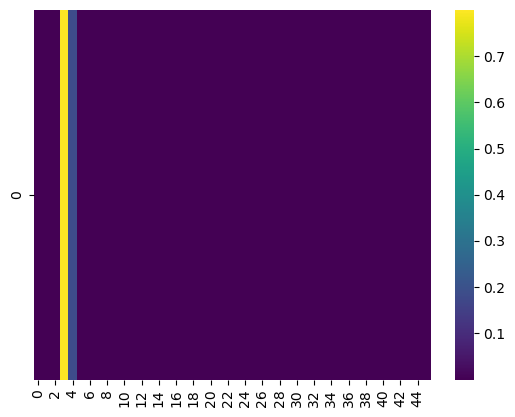

In [76]:
# graphic representation of the prediction
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(predictions[0].reshape(1,46), cmap='viridis')
plt.show()
